<a href="https://colab.research.google.com/github/Kanksha-09/DSBDA/blob/main/Assg5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [19]:
import pandas as pd
data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [20]:
print(data.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [21]:
print(data.isnull())

     User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      False   False  False            False      False
4      False   False  False            False      False
..       ...     ...    ...              ...        ...
395    False   False  False            False      False
396    False   False  False            False      False
397    False   False  False            False      False
398    False   False  False            False      False
399    False   False  False            False      False

[400 rows x 5 columns]


In [22]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

print('Classification Report:\n', classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
 [[50  2]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

Accuracy: 0.86


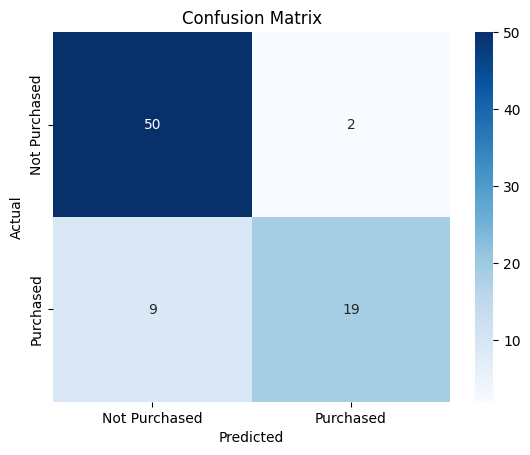

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

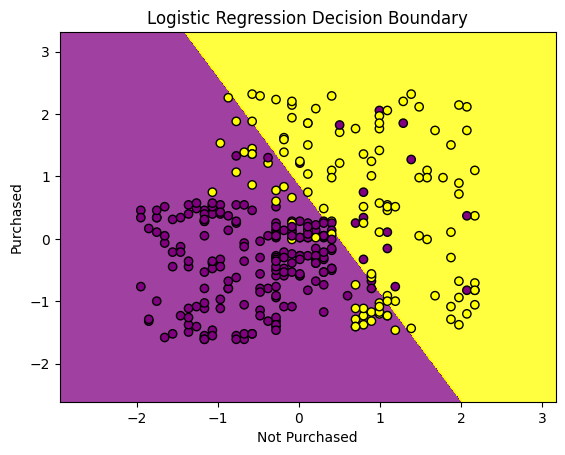

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('purple', 'yellow')))

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('purple', 'yellow')), edgecolors='k')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<Axes: >

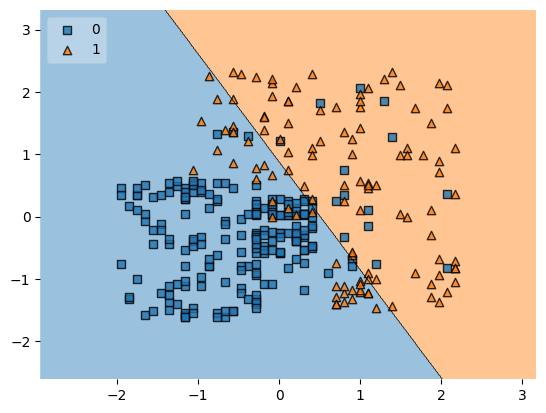

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=classifier, legend=2)